In [1]:
# azure-cognitiveservices-vision-customvision이라는 라이브러리를 설치하는 명령어
!pip install azure-cognitiveservices-vision-customvision


In [2]:
#Azure의 Custom Vision 서비스에서 예측 클라이언트를 가져옵니다.
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient

#인증 설정
from msrest.authentication import ApiKeyCredentials

#데이터 시각화 라이브러리인 Matplotlib에서 pyplot 모듈을 가져옵니다.
from matplotlib import pyplot as plt

#Python Imaging Library(PIL)에서 Image, ImageDraw, ImageFont 클래스를 가져옵니다.
#이미지를 열고, 수정하고, 텍스트를 추가하는 데 사용됩니다.
from PIL import Image, ImageDraw, ImageFont

#수치 계산 라이브러리인 NumPy를 가져옵니다. np라는 별칭
#NumPy는 배열과 행렬 연산
import numpy as np

#운영 체제와 상호 작용하는 기능을 제공하는 os 모듈 가져옵니다.
#파일 처리.
import os


In [3]:
#custom vision의 Endpoint과 프로그램과 연동, 연결
prediction_endpoint = "https://t700rs-prediction.cognitiveservices.azure.com/"
prediction_key = "55bf2ed01825441a9b775c789a12d1c6"
project_id = "a7975a57-4c35-485a-887e-86604a385f47"
model_name =  "Iteration1"


In [4]:
#ApiKeyCredentials를 사용하여 API 키를 인증() Custom Vision 서비스에 대한 액세스를 제공)
credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})

##인증된 자격 증명을 사용하여 CustomVisionPredictionClient를 생성합니다.
##이 클라이언트는 이미지에서 객체를 감지하는 데 사용됩니다.
prediction_client = CustomVisionPredictionClient(endpoint=prediction_endpoint, credentials=credentials)

In [5]:
# Load image and get height, width and channels
image_file = '1.jpg'

#이미지 파일 등록 되었음을 출력
print('Detecting objects in', image_file)

#테스트 이미지 파일 오픈
image = Image.open(image_file)

##numy에서 이미지의 shape를 높이, 폭, 채널 읽기
h, w, ch = np.array(image).shape

# Detect objects in the test image
##detect_image 메서드를 사용하여 이미지에서 객체를 감지하고, 그 결과를 results에 저장합니다.
with open(image_file, mode="rb") as image_data:
  results = prediction_client.detect_image(project_id, model_name, image_data)

##예측 결과를 모두 출력(텍스트로 표시됨)
##각 예측에 대한 태그 이름과 확률, 그리고 bounding box의 좌표와 크기를 출력
for prediction in results.predictions:
  print("\t" + prediction.tag_name + ":{0:.2f}% bbox.left = {1:.2f}, bbox.top = {2:.2f}, bbox.width = {3:.2f}, bbox.height = {4:.2f}".format(prediction.probability * 100, prediction.bounding_box.left, prediction.bounding_box.top, prediction.bounding_box.width, prediction.bounding_box.height))

Detecting objects in 1.jpg


	RedLED:50.66% bbox.left = 0.77, bbox.top = 0.17, bbox.width = 0.08, bbox.height = 0.09
	RedLED:41.93% bbox.left = 0.56, bbox.top = 0.00, bbox.width = 0.05, bbox.height = 0.06


Results saved in  output.jpg
Results saved in  output.jpg


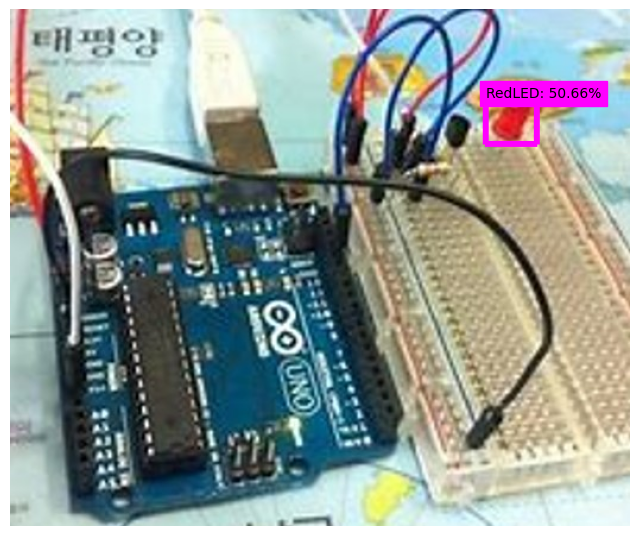

In [6]:

#결과를 표시하기 위한 그림(figure)을 생성
fig = plt.figure(figsize=(8, 8))
plt.axis('off')

# 감지된 각 객체 주위에 상자를 그리기 위한 설정을 합니다.
draw = ImageDraw.Draw(image)
lineWidth = int(w/100)
color = 'magenta'

for prediction in results.predictions:


  #예측 50프로 이상인 개체만 상자를 그려줌
  if (prediction.probability*100) > 50:
    # Box coordinates and dimensions are proportional - convert to absolutes
    left = prediction.bounding_box.left * w
    top = prediction.bounding_box.top * h
    height = prediction.bounding_box.height * h
    width =  prediction.bounding_box.width * w

    # Draw the box
    points = ((left,top), (left+width,top), (left+width,top+height), (left,top+height),(left,top))
    draw.line(points, fill=color, width=lineWidth)
    plt.annotate(prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100),(left,top), backgroundcolor=color)
  plt.imshow(image)

##결과를 이미지 파일로 저장하고, 저장된 파일의 이름을 출력합니다. 이렇게 하면 객체 감지 결과를 시각적으로 확인할 수 있습니다.
  outputfile = 'output.jpg'
  fig.savefig(outputfile)
  print('Results saved in ', outputfile)

